In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = "vegetable-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1817999%2F2965251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240324%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240324T011850Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0b3bd198a03ef023763933ae088b136f84d9250b424930c3cf8be03266c18e175350589dbb06c6b7803465208d47382f7f9b96509945ba51985bab934632857866f24647e0d3367e9d6e577075828aff1458c9f89abb28b13f771764555593d114abed3b7a3cf9e2c57b0d429fc40fe37abce57c309a59c37dc4219c093c579fc4dea187df0c7b712fc0a644af5a5d3fa1f9bb37c1f3dae4a6377410ad22625dfd6efa15b7a03cf2b1ee707664b0c7835e27617d531c15a0a35b503e8d36d6b0a6c0e4fccb9fa24d9b68d5b7cc92f9284c5eb951c489c3f152288be498311cc2f7fca612105e8edd402fc8be315fa87a4fa401a147b1cea3b00b934324bb48a6'"
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 560031432 bytes downloaded
Downloaded and uncompressed: vegetable-image-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/
/kaggle/input/vegetable-image-dataset
/kaggle/input/vegetable-image-dataset/Vegetable Images
/kaggle/input/vegetable-image-dataset/Vegetable Images/test
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Tomato
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cauliflower
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cucumber
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cabbage
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Pumpkin
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Broccoli
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Papaya
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Potato
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Brinjal
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Bottle_Gourd
/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Radish
/kaggle/in

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also

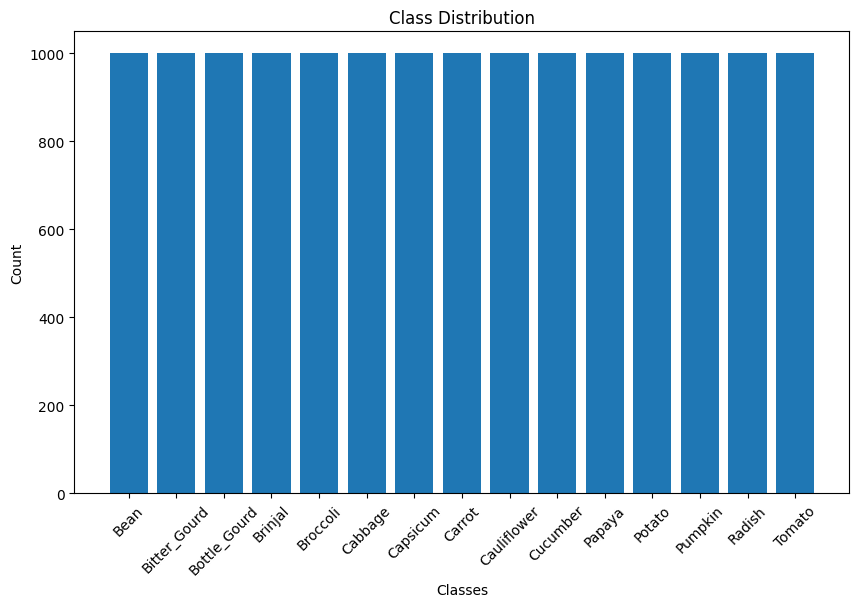

Class Distribution:
Bean: 1000 images
Bitter_Gourd: 1000 images
Bottle_Gourd: 1000 images
Brinjal: 1000 images
Broccoli: 1000 images
Cabbage: 1000 images
Capsicum: 1000 images
Carrot: 1000 images
Cauliflower: 1000 images
Cucumber: 1000 images
Papaya: 1000 images
Potato: 1000 images
Pumpkin: 1000 images
Radish: 1000 images
Tomato: 1000 images


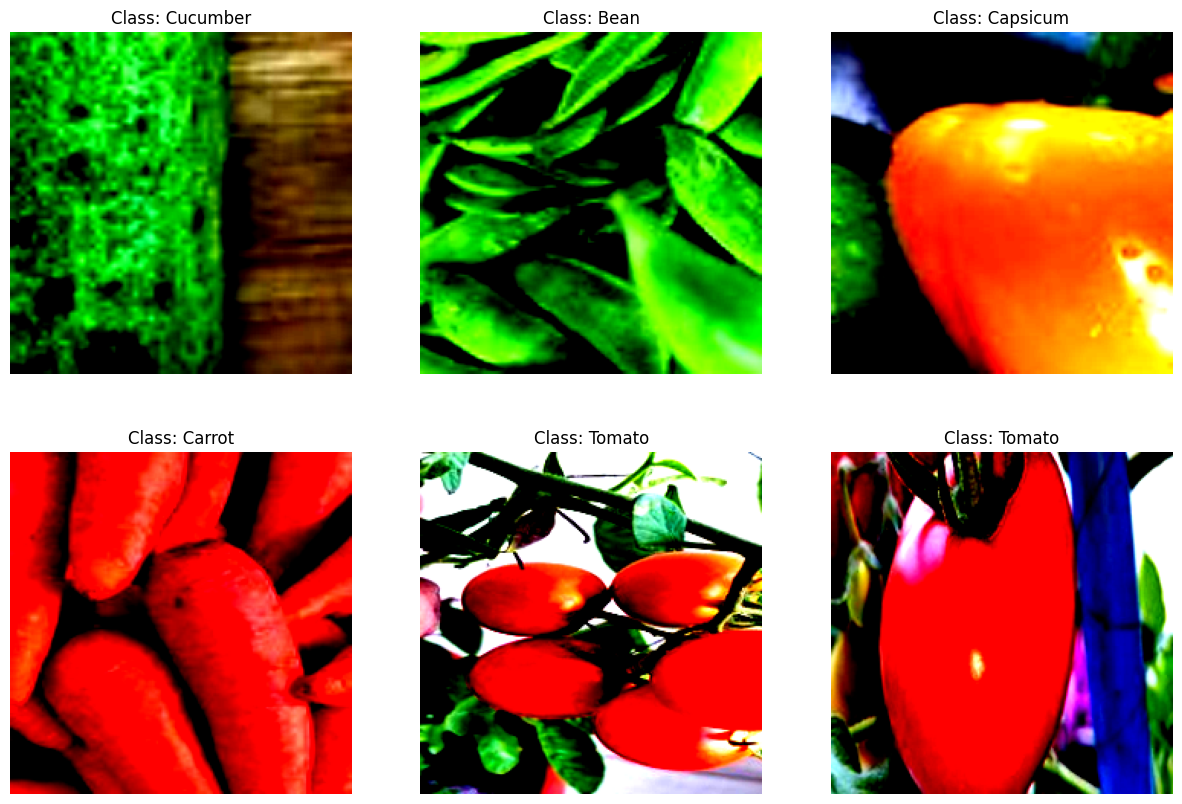

Epoch 1/10
----------
train Loss: 610.9523 Acc: 0.0629
validation Loss: 9.7956 Acc: 0.0667
Epoch 2/10
----------
train Loss: 3.6869 Acc: 0.0647
validation Loss: 2.7095 Acc: 0.0667
Epoch 3/10
----------
train Loss: 2.7102 Acc: 0.0625
validation Loss: 2.7098 Acc: 0.0667
Epoch 4/10
----------
train Loss: 2.7097 Acc: 0.0658
validation Loss: 2.7088 Acc: 0.0667
Epoch 5/10
----------
train Loss: 2.7096 Acc: 0.0652
validation Loss: 2.7091 Acc: 0.0667
Epoch 6/10
----------
train Loss: 2.7099 Acc: 0.0625
validation Loss: 2.7084 Acc: 0.0667
Epoch 7/10
----------
train Loss: 2.7096 Acc: 0.0623
validation Loss: 2.7088 Acc: 0.0667
Epoch 8/10
----------
train Loss: 2.7096 Acc: 0.0658
validation Loss: 2.7088 Acc: 0.0667
Epoch 9/10
----------
train Loss: 2.7098 Acc: 0.0659
validation Loss: 2.7089 Acc: 0.0667
Epoch 10/10
----------
train Loss: 2.7098 Acc: 0.0658
validation Loss: 2.7089 Acc: 0.0667
Best validation Acc: 0.066667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.0667
Precision: 0.0044
Recall: 0.0667
F1 Score: 0.0083
Mean Loss: 2.7089


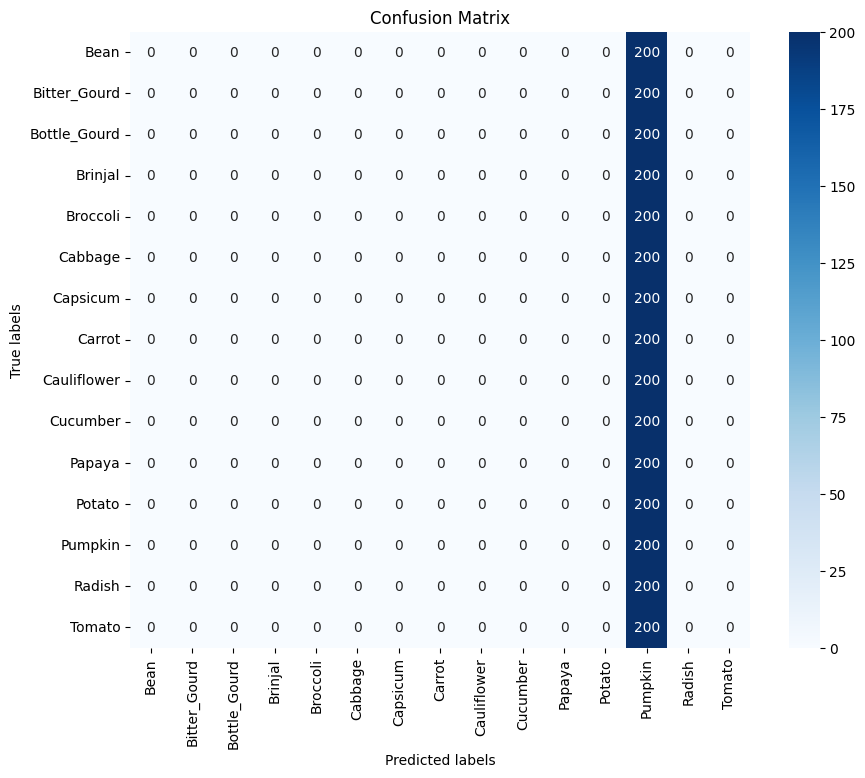

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Constants
DATA_DIRECTORY = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
BATCH_SIZE = 64
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.alexnet(pretrained=True) # pretrained true
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(image_datasets['train'].classes))
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc

    print('Best validation Acc: {:4f}'.format(best_acc))

# Usage
image_datasets = load_datasets()
dataloaders = create_dataloaders(image_datasets)
model = setup_model()

# Explore dataset after transform
def explore_dataset(dataset):
    class_names = dataset.classes
    class_counts = {class_name: 0 for class_name in class_names}

    for _, label in dataset:
        class_counts[class_names[label]] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    print("Class Distribution:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    # Display sample images
    sample_loader = DataLoader(dataset, batch_size=6, shuffle=True)
    data_iter = iter(sample_loader)
    images, labels = next(data_iter)

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f'Class: {class_names[labels[i]]}')
        plt.axis('off')
    plt.show()

explore_dataset(image_datasets['train'])

# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam optimizer
train_model(model, criterion, optimizer, num_epochs=10)

def evaluate_model(model, dataloader):
    """
    Evaluate the model on the given dataloader.

    Args:
        model (nn.Module): The trained model.
        dataloader (DataLoader): DataLoader for test/validation data.

    Returns:
        Tuple of true labels and predicted labels.
    """
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    return y_true, y_pred

# Evaluate the model
y_true, y_pred = evaluate_model(model, dataloaders['test'])

def plot_confusion_matrix(conf_matrix, class_names):
    """
    Plot the confusion matrix.

    Args:
        conf_matrix (np.ndarray): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
class_names = image_datasets['test'].classes
plot_confusion_matrix(conf_matrix, class_names)


With Batch size 32

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also

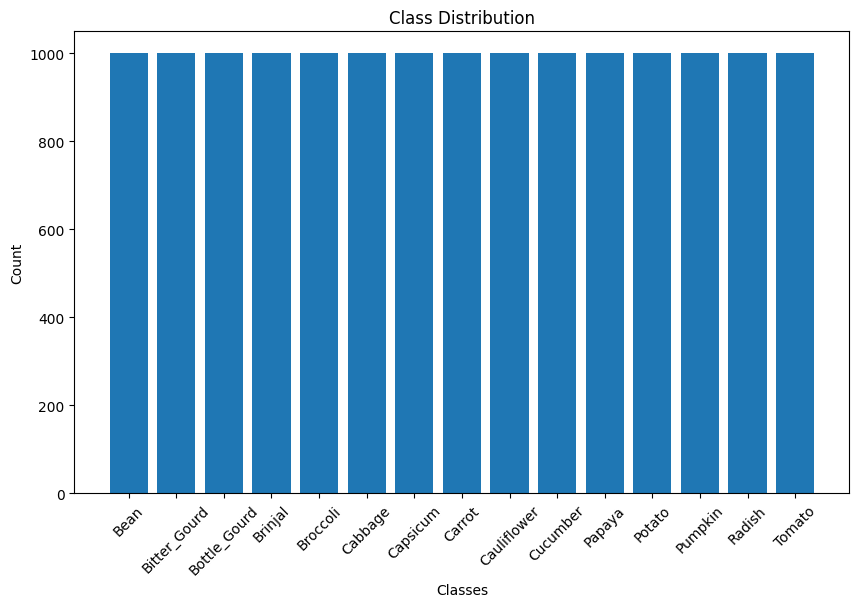

Class Distribution:
Bean: 1000 images
Bitter_Gourd: 1000 images
Bottle_Gourd: 1000 images
Brinjal: 1000 images
Broccoli: 1000 images
Cabbage: 1000 images
Capsicum: 1000 images
Carrot: 1000 images
Cauliflower: 1000 images
Cucumber: 1000 images
Papaya: 1000 images
Potato: 1000 images
Pumpkin: 1000 images
Radish: 1000 images
Tomato: 1000 images


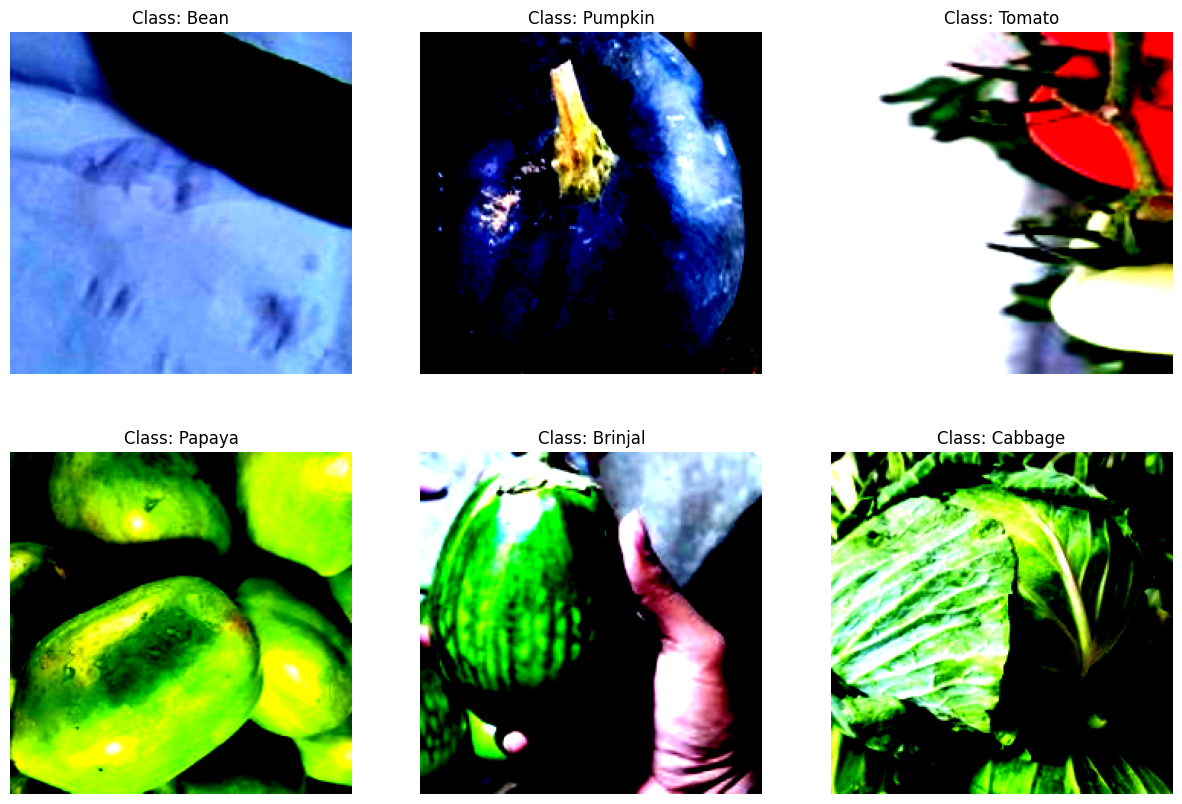

Epoch 1/10
----------
train Loss: 311.2336 Acc: 0.0639
validation Loss: 2.7096 Acc: 0.0667
Epoch 2/10
----------
train Loss: 34.1738 Acc: 0.0692
validation Loss: 2.7085 Acc: 0.0670
Epoch 3/10
----------
train Loss: 2.7128 Acc: 0.0605
validation Loss: 2.7108 Acc: 0.0670
Epoch 4/10
----------
train Loss: 2.7103 Acc: 0.0652
validation Loss: 2.7093 Acc: 0.0670
Epoch 5/10
----------
train Loss: 2.7101 Acc: 0.0644
validation Loss: 2.7093 Acc: 0.0670
Epoch 6/10
----------
train Loss: 4.4675 Acc: 0.0664
validation Loss: 2.7092 Acc: 0.0667
Epoch 7/10
----------
train Loss: 2.7102 Acc: 0.0649
validation Loss: 2.7091 Acc: 0.0667
Epoch 8/10
----------
train Loss: 2.7105 Acc: 0.0627
validation Loss: 2.7086 Acc: 0.0667
Epoch 9/10
----------
train Loss: 2.7100 Acc: 0.0622
validation Loss: 2.7096 Acc: 0.0667
Epoch 10/10
----------
train Loss: 2.9488 Acc: 0.0597
validation Loss: 2.7085 Acc: 0.0667
Best validation Acc: 0.067000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.0667
Precision: 0.0044
Recall: 0.0667
F1 Score: 0.0083
Mean Loss: 2.7085


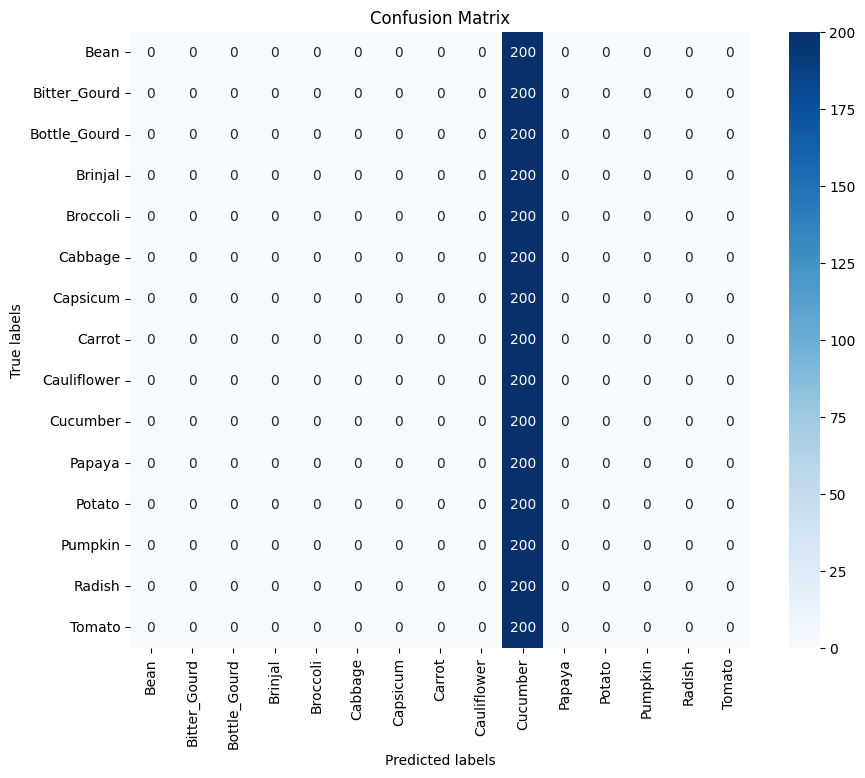

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Constants
DATA_DIRECTORY = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
BATCH_SIZE = 32
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.alexnet(pretrained=True) # pretrained true
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(image_datasets['train'].classes))
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc

    print('Best validation Acc: {:4f}'.format(best_acc))

# Usage
image_datasets = load_datasets()
dataloaders = create_dataloaders(image_datasets)
model = setup_model()

# Explore dataset after transform
def explore_dataset(dataset):
    class_names = dataset.classes
    class_counts = {class_name: 0 for class_name in class_names}

    for _, label in dataset:
        class_counts[class_names[label]] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    print("Class Distribution:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    # Display sample images
    sample_loader = DataLoader(dataset, batch_size=6, shuffle=True)
    data_iter = iter(sample_loader)
    images, labels = next(data_iter)

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f'Class: {class_names[labels[i]]}')
        plt.axis('off')
    plt.show()

explore_dataset(image_datasets['train'])

# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam optimizer
train_model(model, criterion, optimizer, num_epochs=10)

def evaluate_model(model, dataloader):
    """
    Evaluate the model on the given dataloader.

    Args:
        model (nn.Module): The trained model.
        dataloader (DataLoader): DataLoader for test/validation data.

    Returns:
        Tuple of true labels and predicted labels.
    """
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    return y_true, y_pred

# Evaluate the model
y_true, y_pred = evaluate_model(model, dataloaders['test'])

def plot_confusion_matrix(conf_matrix, class_names):
    """
    Plot the confusion matrix.

    Args:
        conf_matrix (np.ndarray): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
class_names = image_datasets['test'].classes
plot_confusion_matrix(conf_matrix, class_names)


With Learning rate - 0.001

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also

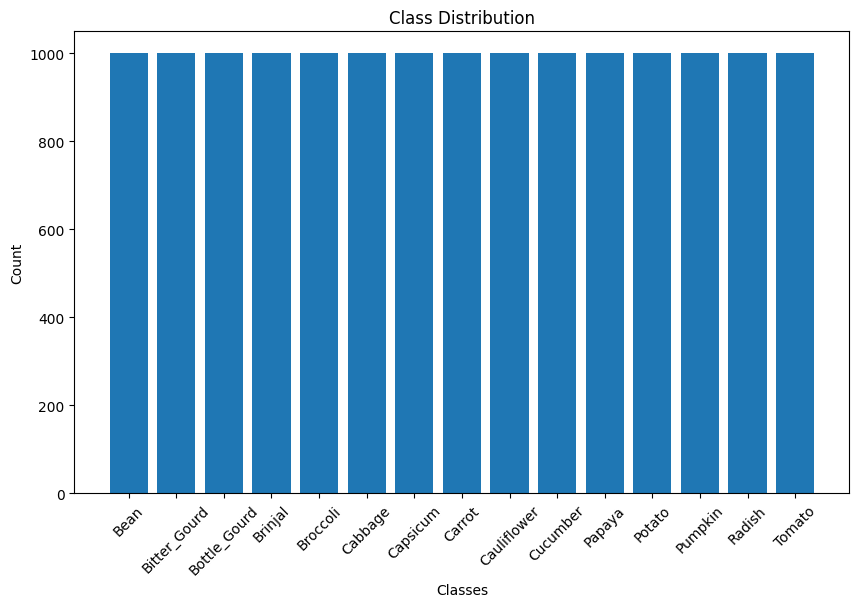

Class Distribution:
Bean: 1000 images
Bitter_Gourd: 1000 images
Bottle_Gourd: 1000 images
Brinjal: 1000 images
Broccoli: 1000 images
Cabbage: 1000 images
Capsicum: 1000 images
Carrot: 1000 images
Cauliflower: 1000 images
Cucumber: 1000 images
Papaya: 1000 images
Potato: 1000 images
Pumpkin: 1000 images
Radish: 1000 images
Tomato: 1000 images


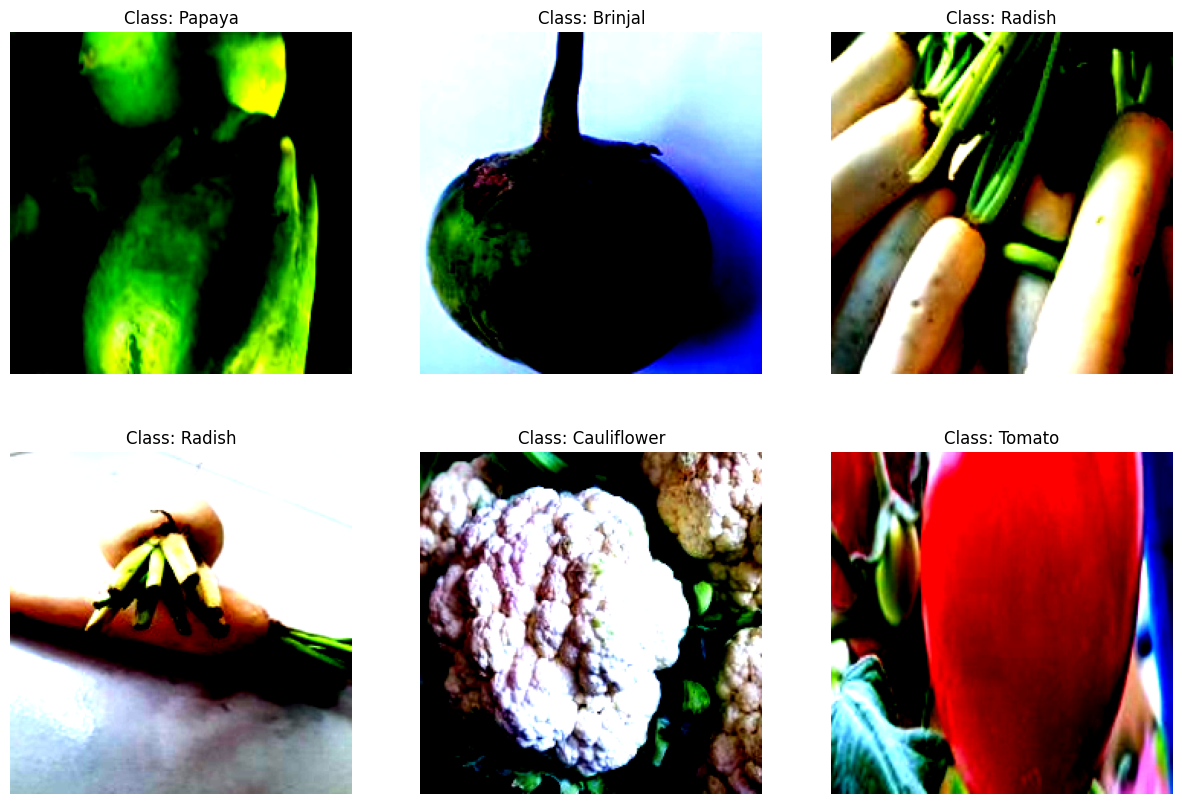

Epoch 1/10
----------
train Loss: 1.5410 Acc: 0.4908
validation Loss: 0.9021 Acc: 0.7403
Epoch 2/10
----------
train Loss: 0.9024 Acc: 0.7205
validation Loss: 0.6338 Acc: 0.8273
Epoch 3/10
----------
train Loss: 0.6859 Acc: 0.7983
validation Loss: 0.3243 Acc: 0.9110
Epoch 4/10
----------
train Loss: 0.5519 Acc: 0.8413
validation Loss: 0.3281 Acc: 0.9137
Epoch 5/10
----------
train Loss: 0.4995 Acc: 0.8613
validation Loss: 0.3698 Acc: 0.9040
Epoch 6/10
----------
train Loss: 0.4695 Acc: 0.8641
validation Loss: 0.1842 Acc: 0.9527
Epoch 7/10
----------
train Loss: 0.4710 Acc: 0.8706
validation Loss: 0.2195 Acc: 0.9363
Epoch 8/10
----------
train Loss: 0.4181 Acc: 0.8821
validation Loss: 0.2563 Acc: 0.9377
Epoch 9/10
----------
train Loss: 0.3994 Acc: 0.8907
validation Loss: 0.1221 Acc: 0.9660
Epoch 10/10
----------
train Loss: 0.4177 Acc: 0.8862
validation Loss: 0.1721 Acc: 0.9480
Best validation Acc: 0.966000
Test Accuracy: 0.9477
Precision: 0.9485
Recall: 0.9477
F1 Score: 0.9470
Mean Lo

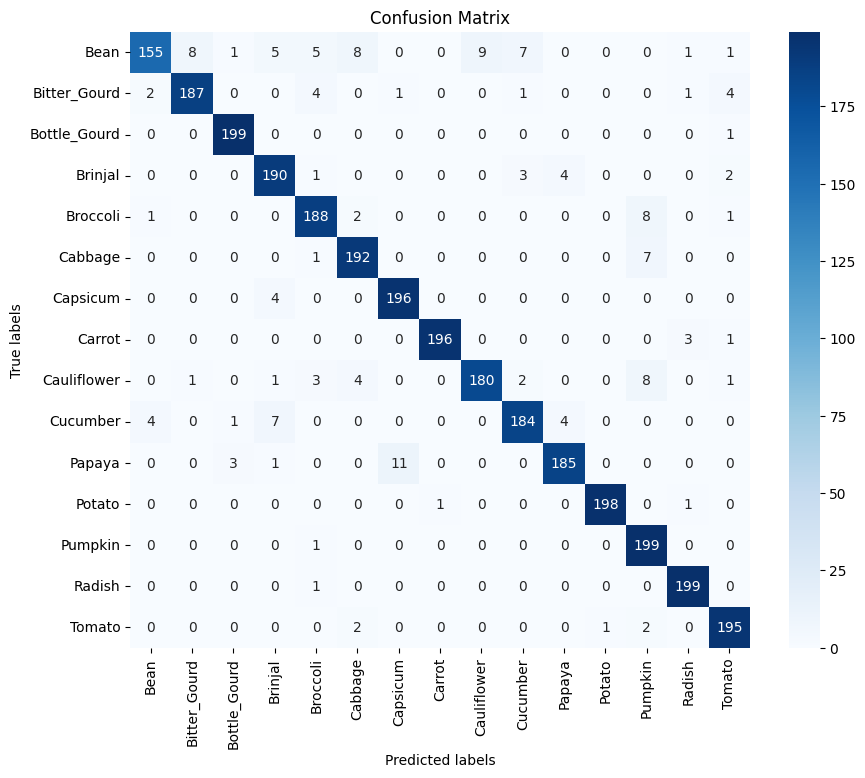

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Constants
DATA_DIRECTORY = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
BATCH_SIZE = 64
NUM_WORKERS = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

def load_datasets():
    return {x: datasets.ImageFolder(os.path.join(DATA_DIRECTORY, x), data_transforms[x]) for x in ['train', 'validation', 'test']}

def create_dataloaders(image_datasets):
    return {x: DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS) for x in ['train', 'validation', 'test']}

def setup_model():
    model = models.alexnet(pretrained=True) # pretrained true
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(image_datasets['train'].classes))
    return model.to(device)

def train_model(model, criterion, optimizer, num_epochs=10):
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc

    print('Best validation Acc: {:4f}'.format(best_acc))

# Usage
image_datasets = load_datasets()
dataloaders = create_dataloaders(image_datasets)
model = setup_model()

# Explore dataset after transform
def explore_dataset(dataset):
    class_names = dataset.classes
    class_counts = {class_name: 0 for class_name in class_names}

    for _, label in dataset:
        class_counts[class_names[label]] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

    print("Class Distribution:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    # Display sample images
    sample_loader = DataLoader(dataset, batch_size=6, shuffle=True)
    data_iter = iter(sample_loader)
    images, labels = next(data_iter)

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title(f'Class: {class_names[labels[i]]}')
        plt.axis('off')
    plt.show()

explore_dataset(image_datasets['train'])

# Train model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer
train_model(model, criterion, optimizer, num_epochs=10)

def evaluate_model(model, dataloader):
    """
    Evaluate the model on the given dataloader.

    Args:
        model (nn.Module): The trained model.
        dataloader (DataLoader): DataLoader for test/validation data.

    Returns:
        Tuple of true labels and predicted labels.
    """
    model.eval()
    y_true = []
    y_pred = []
    losses = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            loss = criterion(outputs, labels)
            losses.append(loss.item())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    mean_loss = np.mean(losses)

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Mean Loss: {mean_loss:.4f}')

    return y_true, y_pred

# Evaluate the model
y_true, y_pred = evaluate_model(model, dataloaders['test'])

def plot_confusion_matrix(conf_matrix, class_names):
    """
    Plot the confusion matrix.

    Args:
        conf_matrix (np.ndarray): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
class_names = image_datasets['test'].classes
plot_confusion_matrix(conf_matrix, class_names)
